Steps For Training Model

1. Loading the datset
2. Knowing the data and EDA
3. Visualizing the datasetr
4. creating the dataframe by splitting
5. Training the data & Trying differnet model for accuracy
6. Conclusion (Best Model)

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 1 step - Loading the dataset

In [2]:
data = pd.read_csv(r"D:\Data\Desktop\MIniProj\SecurityPortal\NoteBooks\Datasets\phishing.csv")

# 2nd Step - Knowing the data and EDA

In [3]:
data.head()


Index  UsingIP  LongURL  ShortURL  Symbol@  Redirecting//  PrefixSuffix-  \
0      0        1        1         1        1              1             -1   
1      1        1        0         1        1              1             -1   
2      2        1        0         1        1              1             -1   
3      3        1        0        -1        1              1             -1   
4      4       -1        0        -1        1             -1             -1   

   SubDomains  HTTPS  DomainRegLen  ...  UsingPopupWindow  IframeRedirection  \
0           0      1            -1  ...                 1                  1   
1          -1     -1            -1  ...                 1                  1   
2          -1     -1             1  ...                 1                  1   
3           1      1            -1  ...                -1                  1   
4           1      1            -1  ...                 1                  1   

   AgeofDomain  DNSRecording  WebsiteTraffic  PageRank  GoogleIndex  \
0           -1            -1               0        -1            1   
1            1            -1               1        -1            1   
2           -1            -1               1        -1            1   
3           -1            -1               0        -1            1   
4            1             1               1        -1            1   

   LinksPointingToPage  StatsReport  class  
0                    1            1     -1  
1                    0           -1     -1  
2                   -1            1     -1  
3                    1            1      1  
4                   -1           -1      1  

[5 rows x 32 columns]

In [4]:
data.tail()

Index  UsingIP  LongURL  ShortURL  Symbol@  Redirecting//  \
11049  11049        1       -1         1       -1              1   
11050  11050       -1        1         1       -1             -1   
11051  11051        1       -1         1        1              1   
11052  11052       -1       -1         1        1              1   
11053  11053       -1       -1         1        1              1   

       PrefixSuffix-  SubDomains  HTTPS  DomainRegLen  ...  UsingPopupWindow  \
11049              1           1      1            -1  ...                -1   
11050             -1           1     -1            -1  ...                -1   
11051             -1           1     -1            -1  ...                 1   
11052             -1          -1     -1             1  ...                -1   
11053             -1          -1     -1             1  ...                 1   

       IframeRedirection  AgeofDomain  DNSRecording  WebsiteTraffic  PageRank  \
11049                 -1            1             1              -1        -1   
11050                  1            1             1               1         1   
11051                  1            1             1               1        -1   
11052                  1            1             1               1        -1   
11053                  1           -1             1              -1        -1   

       GoogleIndex  LinksPointingToPage  StatsReport  class  
11049            1                    1            1      1  
11050            1                   -1            1     -1  
11051            1                    0            1     -1  
11052            1                    1            1     -1  
11053           -1                    1           -1     -1  

[5 rows x 32 columns]

In [5]:
data.info()

# [11054 rows x 32 columns]>
# all datatype of int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64
 16  ServerFormHandler    1

In [6]:
data.describe()

Index       UsingIP       LongURL      ShortURL       Symbol@  \
count  11054.000000  11054.000000  11054.000000  11054.000000  11054.000000   
mean    5526.500000      0.313914     -0.633345      0.738737      0.700561   
std     3191.159272      0.949495      0.765973      0.674024      0.713625   
min        0.000000     -1.000000     -1.000000     -1.000000     -1.000000   
25%     2763.250000     -1.000000     -1.000000      1.000000      1.000000   
50%     5526.500000      1.000000     -1.000000      1.000000      1.000000   
75%     8289.750000      1.000000     -1.000000      1.000000      1.000000   
max    11053.000000      1.000000      1.000000      1.000000      1.000000   

       Redirecting//  PrefixSuffix-    SubDomains         HTTPS  DomainRegLen  \
count   11054.000000   11054.000000  11054.000000  11054.000000  11054.000000   
mean        0.741632      -0.734938      0.064049      0.251040     -0.336711   
std         0.670837       0.678165      0.817492      0.911856      0.941651   
min        -1.000000      -1.000000     -1.000000     -1.000000     -1.000000   
25%         1.000000      -1.000000     -1.000000     -1.000000     -1.000000   
50%         1.000000      -1.000000      0.000000      1.000000     -1.000000   
75%         1.000000      -1.000000      1.000000      1.000000      1.000000   
max         1.000000       1.000000      1.000000      1.000000      1.000000   

       ...  UsingPopupWindow  IframeRedirection   AgeofDomain  DNSRecording  \
count  ...      11054.000000       11054.000000  11054.000000  11054.000000   
mean   ...          0.613353           0.816899      0.061335      0.377239   
std    ...          0.789845           0.576807      0.998162      0.926158   
min    ...         -1.000000          -1.000000     -1.000000     -1.000000   
25%    ...          1.000000           1.000000     -1.000000     -1.000000   
50%    ...          1.000000           1.000000      1.000000      1.000000   
75%    ...          1.000000           1.000000      1.000000      1.000000   
max    ...          1.000000           1.000000      1.000000      1.000000   

       WebsiteTraffic      PageRank   GoogleIndex  LinksPointingToPage  \
count    11054.000000  11054.000000  11054.000000         11054.000000   
mean         0.287407     -0.483626      0.721549             0.343948   
std          0.827680      0.875314      0.692395             0.569936   
min         -1.000000     -1.000000     -1.000000            -1.000000   
25%          0.000000     -1.000000      1.000000             0.000000   
50%          1.000000     -1.000000      1.000000             0.000000   
75%          1.000000      1.000000      1.000000             1.000000   
max          1.000000      1.000000      1.000000             1.000000   

        StatsReport         class  
count  11054.000000  11054.000000  
mean       0.719739      0.113986  
std        0.694276      0.993527  
min       -1.000000     -1.000000  
25%        1.000000     -1.000000  
50%        1.000000      1.000000  
75%        1.000000      1.000000  
max        1.000000      1.000000  

[8 rows x 32 columns]

In [7]:
data.shape
# (11054, 32)

(11054, 32)

In [8]:
data.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [9]:
data.nunique()

Index                  11054
UsingIP                    2
LongURL                    3
ShortURL                   2
Symbol@                    2
Redirecting//              2
PrefixSuffix-              2
SubDomains                 3
HTTPS                      3
DomainRegLen               2
Favicon                    2
NonStdPort                 2
HTTPSDomainURL             2
RequestURL                 2
AnchorURL                  3
LinksInScriptTags          3
ServerFormHandler          3
InfoEmail                  2
AbnormalURL                2
WebsiteForwarding          2
StatusBarCust              2
DisableRightClick          2
UsingPopupWindow           2
IframeRedirection          2
AgeofDomain                2
DNSRecording               2
WebsiteTraffic             3
PageRank                   2
GoogleIndex                2
LinksPointingToPage        3
StatsReport                2
class                      2
dtype: int64

In [10]:
# We dosen't require the index column (1st col) so dropping the column
data=data.drop(['Index'],axis=1)

In [11]:
data.describe().T

count      mean       std  min  25%  50%  75%  max
UsingIP              11054.0  0.313914  0.949495 -1.0 -1.0  1.0  1.0  1.0
LongURL              11054.0 -0.633345  0.765973 -1.0 -1.0 -1.0 -1.0  1.0
ShortURL             11054.0  0.738737  0.674024 -1.0  1.0  1.0  1.0  1.0
Symbol@              11054.0  0.700561  0.713625 -1.0  1.0  1.0  1.0  1.0
Redirecting//        11054.0  0.741632  0.670837 -1.0  1.0  1.0  1.0  1.0
PrefixSuffix-        11054.0 -0.734938  0.678165 -1.0 -1.0 -1.0 -1.0  1.0
SubDomains           11054.0  0.064049  0.817492 -1.0 -1.0  0.0  1.0  1.0
HTTPS                11054.0  0.251040  0.911856 -1.0 -1.0  1.0  1.0  1.0
DomainRegLen         11054.0 -0.336711  0.941651 -1.0 -1.0 -1.0  1.0  1.0
Favicon              11054.0  0.628551  0.777804 -1.0  1.0  1.0  1.0  1.0
NonStdPort           11054.0  0.728243  0.685350 -1.0  1.0  1.0  1.0  1.0
HTTPSDomainURL       11054.0  0.675231  0.737640 -1.0  1.0  1.0  1.0  1.0
RequestURL           11054.0  0.186720  0.982458 -1.0 -1.0  1.0  1.0  1.0
AnchorURL            11054.0 -0.076443  0.715116 -1.0 -1.0  0.0  0.0  1.0
LinksInScriptTags    11054.0 -0.118238  0.763933 -1.0 -1.0  0.0  0.0  1.0
ServerFormHandler    11054.0 -0.595712  0.759168 -1.0 -1.0 -1.0 -1.0  1.0
InfoEmail            11054.0  0.635788  0.771899 -1.0  1.0  1.0  1.0  1.0
AbnormalURL          11054.0  0.705446  0.708796 -1.0  1.0  1.0  1.0  1.0
WebsiteForwarding    11054.0  0.115705  0.319885  0.0  0.0  0.0  0.0  1.0
StatusBarCust        11054.0  0.762077  0.647516 -1.0  1.0  1.0  1.0  1.0
DisableRightClick    11054.0  0.913877  0.406009 -1.0  1.0  1.0  1.0  1.0
UsingPopupWindow     11054.0  0.613353  0.789845 -1.0  1.0  1.0  1.0  1.0
IframeRedirection    11054.0  0.816899  0.576807 -1.0  1.0  1.0  1.0  1.0
AgeofDomain          11054.0  0.061335  0.998162 -1.0 -1.0  1.0  1.0  1.0
DNSRecording         11054.0  0.377239  0.926158 -1.0 -1.0  1.0  1.0  1.0
WebsiteTraffic       11054.0  0.287407  0.827680 -1.0  0.0  1.0  1.0  1.0
PageRank             11054.0 -0.483626  0.875314 -1.0 -1.0 -1.0  1.0  1.0
GoogleIndex          11054.0  0.721549  0.692395 -1.0  1.0  1.0  1.0  1.0
LinksPointingToPage  11054.0  0.343948  0.569936 -1.0  0.0  0.0  1.0  1.0
StatsReport          11054.0  0.719739  0.694276 -1.0  1.0  1.0  1.0  1.0
class                11054.0  0.113986  0.993527 -1.0 -1.0  1.0  1.0  1.0

In [12]:
data.head()

UsingIP  LongURL  ShortURL  Symbol@  Redirecting//  PrefixSuffix-  \
0        1        1         1        1              1             -1   
1        1        0         1        1              1             -1   
2        1        0         1        1              1             -1   
3        1        0        -1        1              1             -1   
4       -1        0        -1        1             -1             -1   

   SubDomains  HTTPS  DomainRegLen  Favicon  ...  UsingPopupWindow  \
0           0      1            -1        1  ...                 1   
1          -1     -1            -1        1  ...                 1   
2          -1     -1             1        1  ...                 1   
3           1      1            -1        1  ...                -1   
4           1      1            -1        1  ...                 1   

   IframeRedirection  AgeofDomain  DNSRecording  WebsiteTraffic  PageRank  \
0                  1           -1            -1               0        -1   
1                  1            1            -1               1        -1   
2                  1           -1            -1               1        -1   
3                  1           -1            -1               0        -1   
4                  1            1             1               1        -1   

   GoogleIndex  LinksPointingToPage  StatsReport  class  
0            1                    1            1     -1  
1            1                    0           -1     -1  
2            1                   -1            1     -1  
3            1                    1            1      1  
4            1                   -1           -1      1  

[5 rows x 31 columns]

# By Anylising the data following things are concluded
1. There are 11054 instances and 31 fearures in dataset.
2. Out of which 30 are independent features where as 1 is dependent feature.
3. Each feature is in int datatype, so there is no need to use LabelEncoder.
4. There is no outlier present in dataset.
5. There is no missing value in dataset

# 3rd step - Data Visulization

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

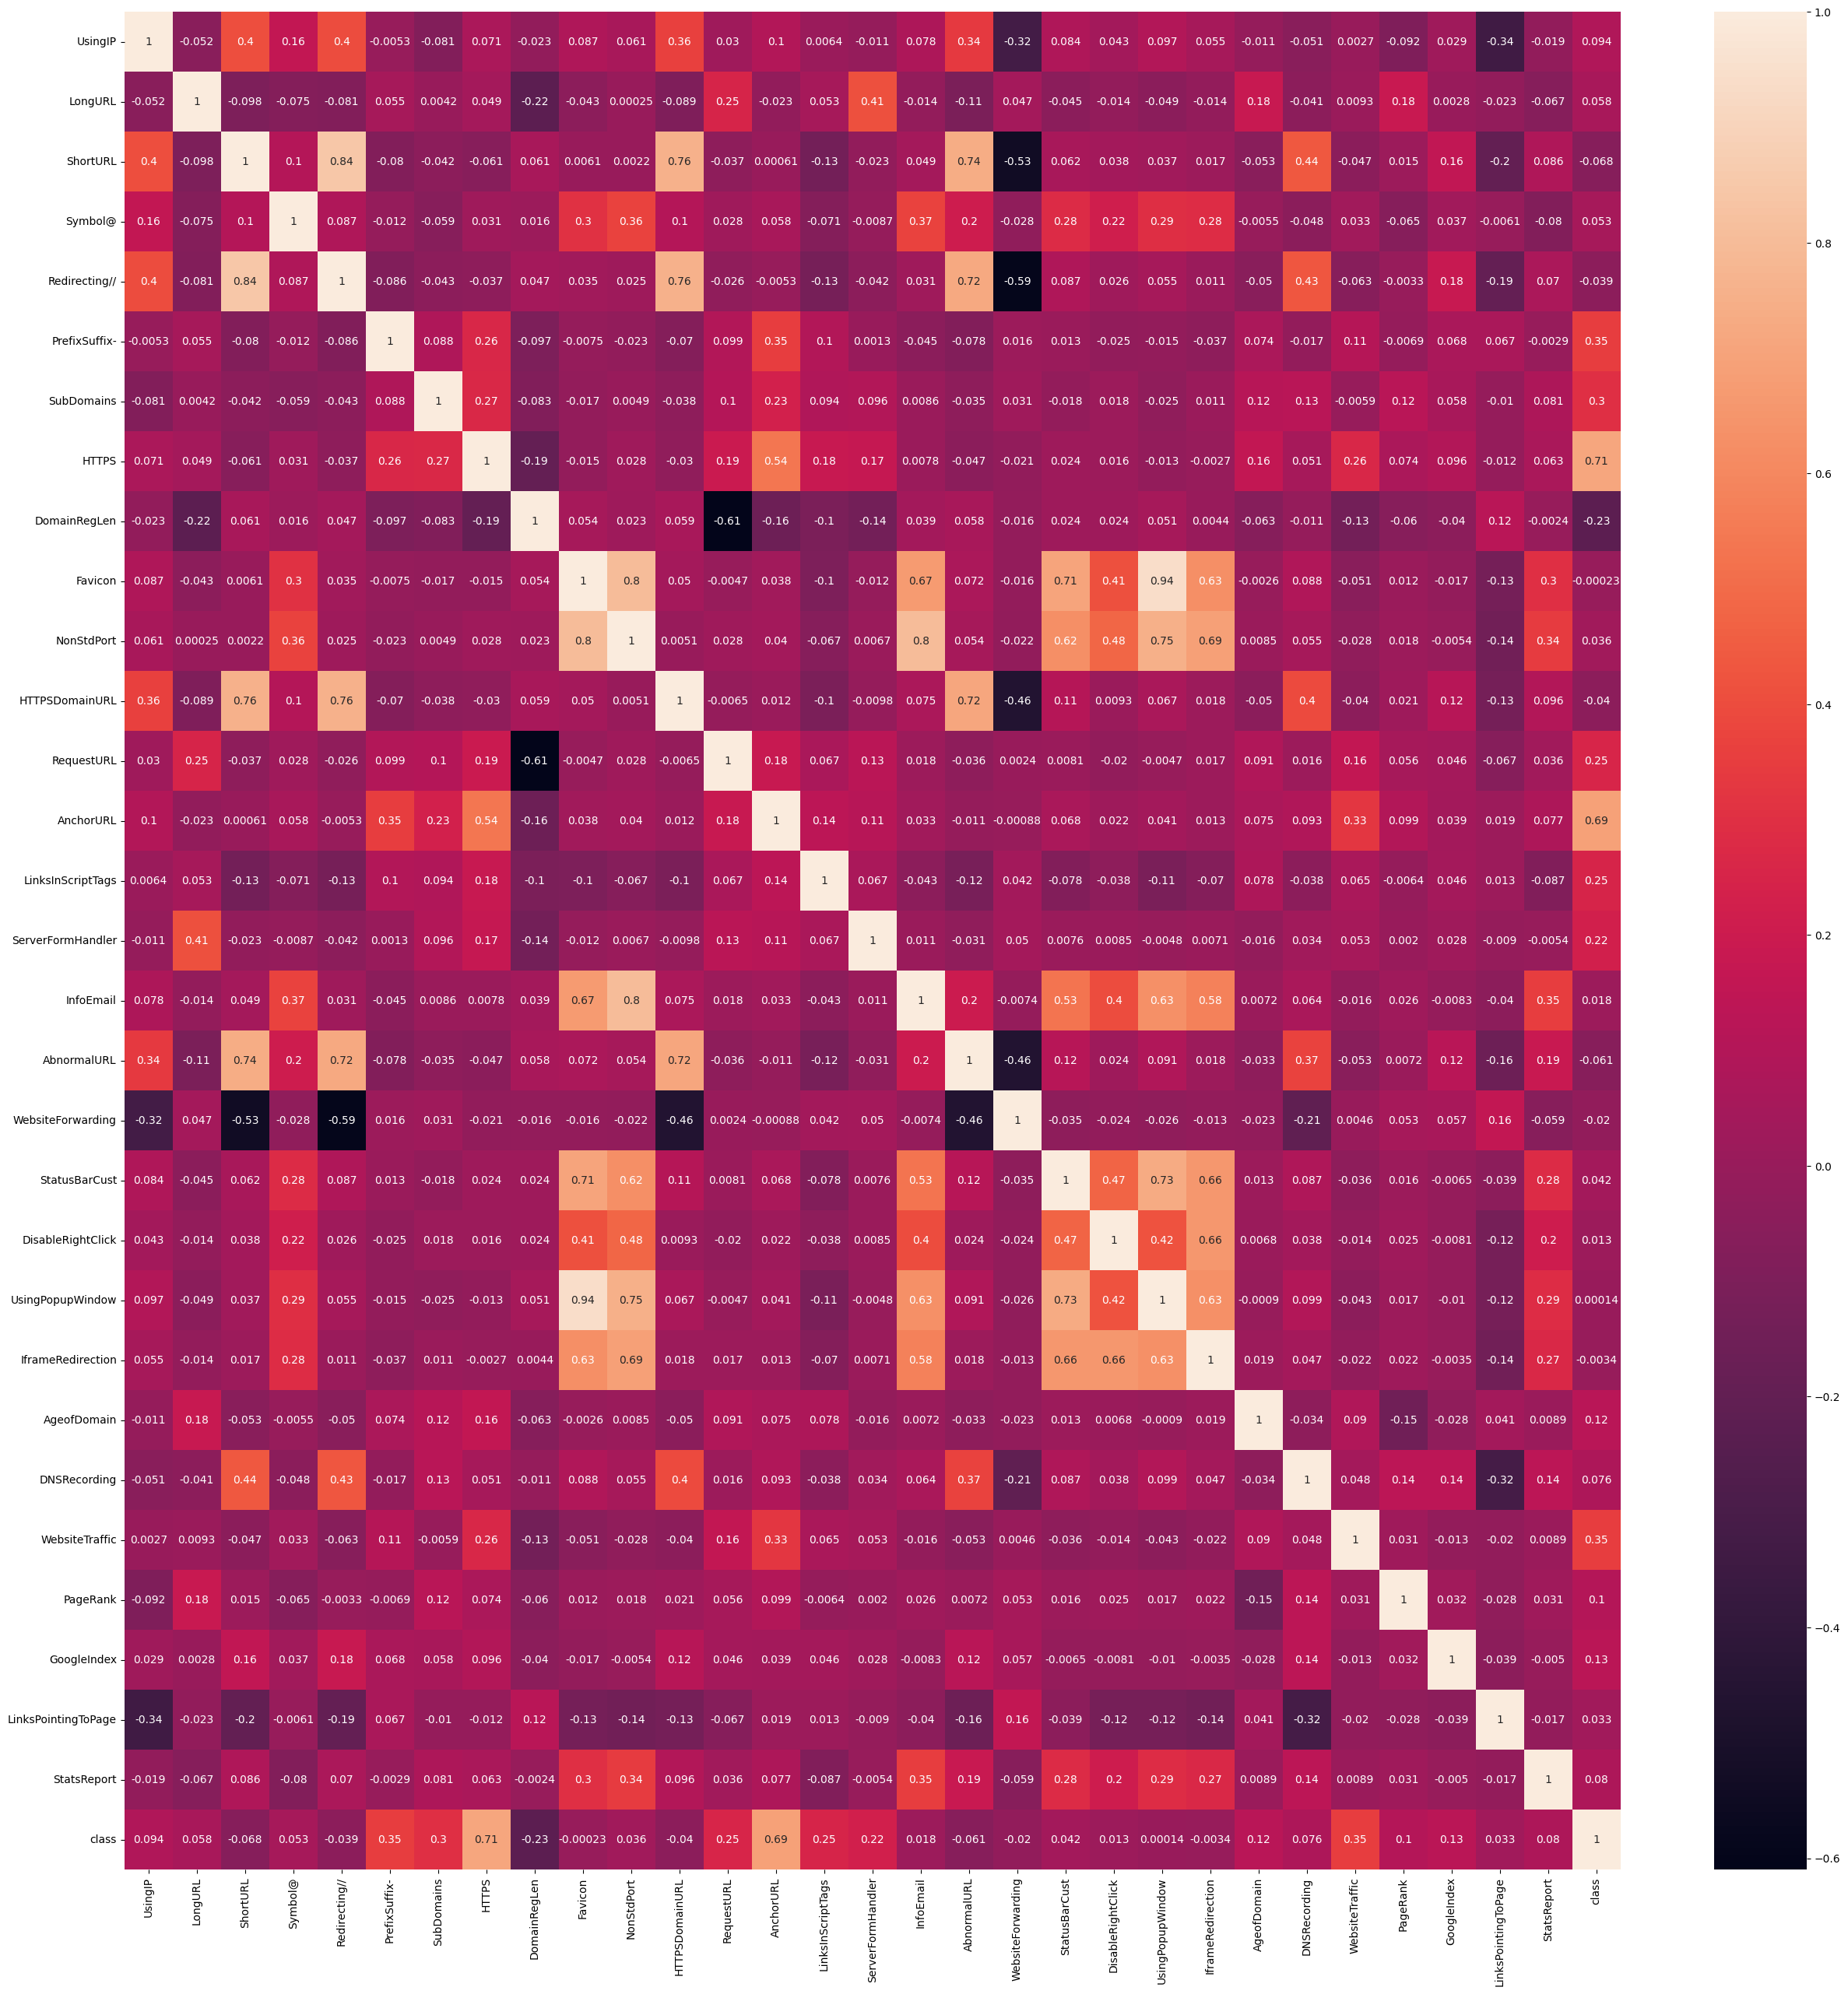

In [14]:
# Correlation heatmap
plt.figure(figsize=(31,31))
sns.heatmap(data.corr(), annot=True)
plt.show()

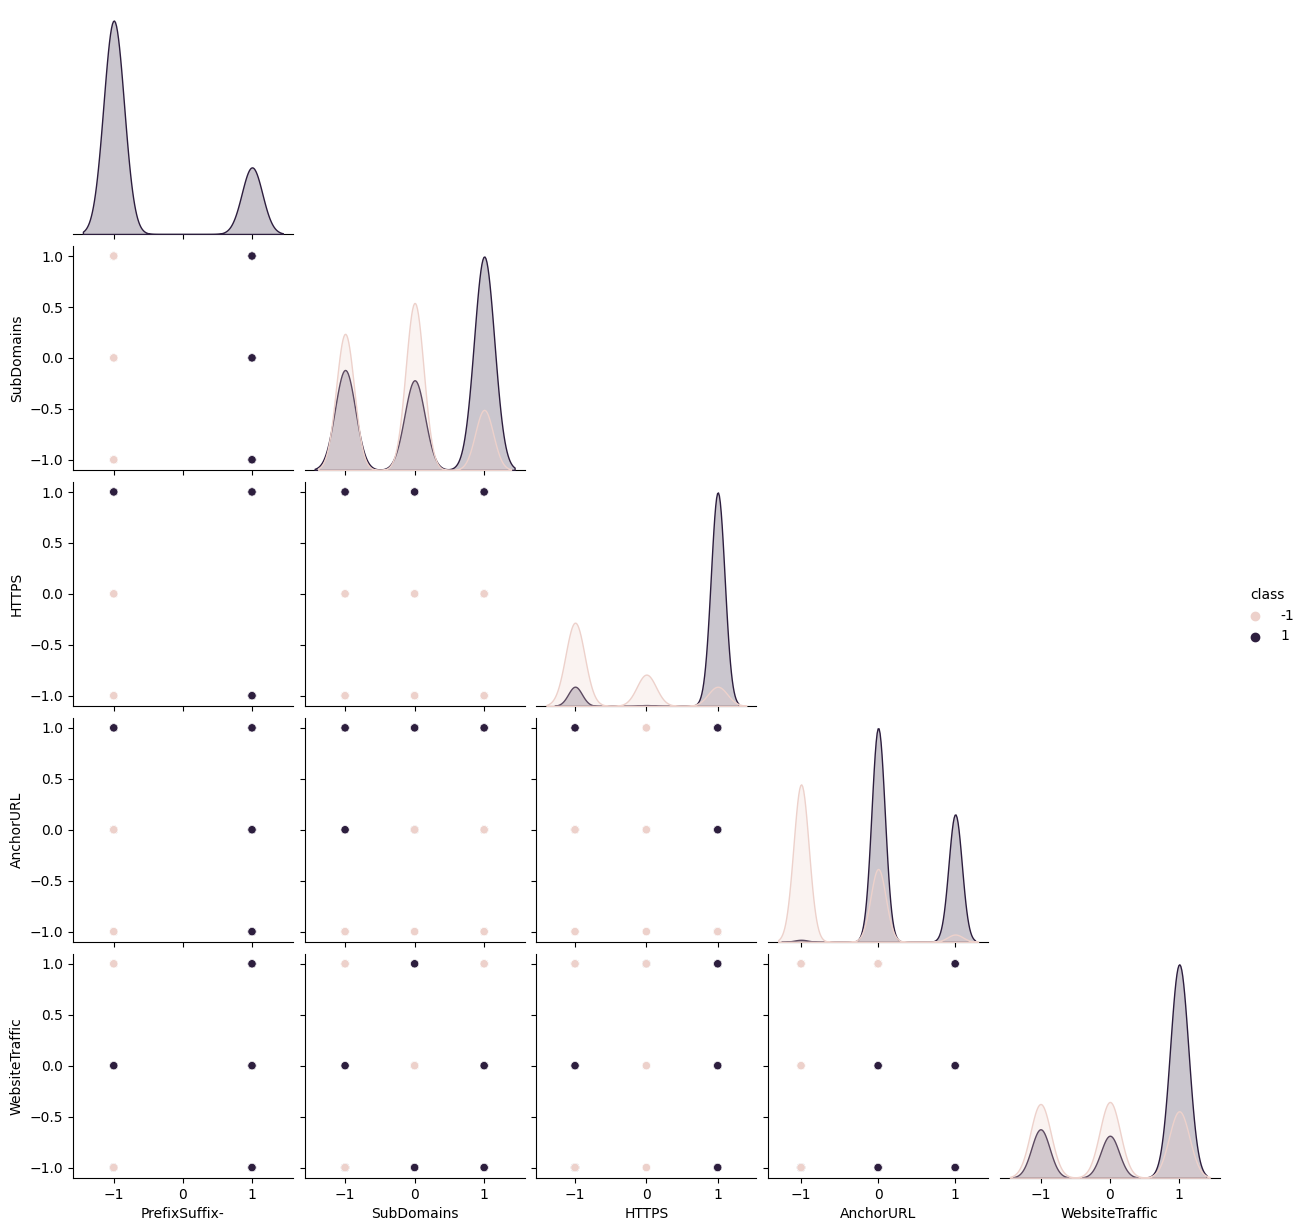

In [15]:
# Pairplot for particular features

df = data[['PrefixSuffix-','SubDomains','HTTPS','AnchorURL','WebsiteTraffic','class']]

sns.pairplot(data =df, hue="class", corner=True)

<function matplotlib.pyplot.show(close=None, block=None)>

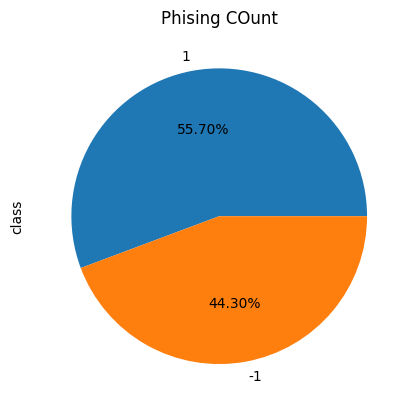

In [16]:
# pie chart for counting 

data['class'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phising COunt")
plt.show

In [17]:
# So the data is somewhat imbalence


# 4th step - Creating dataframe and splitting

In [18]:
x = data.drop(['class'], axis=1)
y=data['class']

In [19]:
x

UsingIP  LongURL  ShortURL  Symbol@  Redirecting//  PrefixSuffix-  \
0            1        1         1        1              1             -1   
1            1        0         1        1              1             -1   
2            1        0         1        1              1             -1   
3            1        0        -1        1              1             -1   
4           -1        0        -1        1             -1             -1   
...        ...      ...       ...      ...            ...            ...   
11049        1       -1         1       -1              1              1   
11050       -1        1         1       -1             -1             -1   
11051        1       -1         1        1              1             -1   
11052       -1       -1         1        1              1             -1   
11053       -1       -1         1        1              1             -1   

       SubDomains  HTTPS  DomainRegLen  Favicon  ...  DisableRightClick  \
0               0      1            -1        1  ...                  1   
1              -1     -1            -1        1  ...                  1   
2              -1     -1             1        1  ...                  1   
3               1      1            -1        1  ...                  1   
4               1      1            -1        1  ...                  1   
...           ...    ...           ...      ...  ...                ...   
11049           1      1            -1       -1  ...                 -1   
11050           1     -1            -1       -1  ...                  1   
11051           1     -1            -1        1  ...                  1   
11052          -1     -1             1       -1  ...                  1   
11053          -1     -1             1        1  ...                  1   

       UsingPopupWindow  IframeRedirection  AgeofDomain  DNSRecording  \
0                     1                  1           -1            -1   
1                     1                  1            1            -1   
2                     1                  1           -1            -1   
3                    -1                  1           -1            -1   
4                     1                  1            1             1   
...                 ...                ...          ...           ...   
11049                -1                 -1            1             1   
11050                -1                  1            1             1   
11051                 1                  1            1             1   
11052                -1                  1            1             1   
11053                 1                  1           -1             1   

       WebsiteTraffic  PageRank  GoogleIndex  LinksPointingToPage  StatsReport  
0                   0        -1            1                    1            1  
1                   1        -1            1                    0           -1  
2                   1        -1            1                   -1            1  
3                   0        -1            1                    1            1  
4                   1        -1            1                   -1           -1  
...               ...       ...          ...                  ...          ...  
11049              -1        -1            1                    1            1  
11050               1         1            1                   -1            1  
11051               1        -1            1                    0            1  
11052               1        -1            1                    1            1  
11053              -1        -1           -1                    1           -1  

[11054 rows x 30 columns]

In [20]:
y

0       -1
1       -1
2       -1
3        1
4        1
        ..
11049    1
11050   -1
11051   -1
11052   -1
11053   -1
Name: class, Length: 11054, dtype: int64

In [21]:
# splitting 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8843, 30), (2211, 30), (8843,), (2211,))

In [23]:
X_train.info(), X_test.info(), y_train.info(), y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8843 entries, 480 to 7270
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   UsingIP              8843 non-null   int64
 1   LongURL              8843 non-null   int64
 2   ShortURL             8843 non-null   int64
 3   Symbol@              8843 non-null   int64
 4   Redirecting//        8843 non-null   int64
 5   PrefixSuffix-        8843 non-null   int64
 6   SubDomains           8843 non-null   int64
 7   HTTPS                8843 non-null   int64
 8   DomainRegLen         8843 non-null   int64
 9   Favicon              8843 non-null   int64
 10  NonStdPort           8843 non-null   int64
 11  HTTPSDomainURL       8843 non-null   int64
 12  RequestURL           8843 non-null   int64
 13  AnchorURL            8843 non-null   int64
 14  LinksInScriptTags    8843 non-null   int64
 15  ServerFormHandler    8843 non-null   int64
 16  InfoEmail            8

(None, None, None, None)

# 5th step - Model Building & Training 
 
 Algorthims used for this as follow
 
     1. Logistic
     2. KNN
     3. SVM
     4. Decision Tree
     5. Multilayer Perceptrons
     
    # 

In [24]:
# Making list to hold the model performance results
# this is reqiured to check which algorithm is the best among the 7
models = []
accuracy = []
f1_Score = []
recall = []
precison = []

def holdResult(model, a,b,c,d):
    models.append(model)
    accuracy.append(round(a,3))
    f1_Score.append(round(b,3))
    recall.append(round(c,3))
    precison.append(round(d,3))
    print(models)

In [25]:
models

[]

# 5.--> 1 Logistic 
    - Used for predict the output which is categorical depend varaible
    - output must be discrete or categorical 

In [26]:
from sklearn.linear_model import LogisticRegression

Log_model = LogisticRegression()

Log_model.fit(X_train, y_train)

LogisticRegression()

In [27]:
y_train_Log_model = Log_model.predict(X_train)
y_test_Log_model = Log_model.predict(X_test)

In [28]:
# lets see the performance of Log_model - accuracy , f1_score ,  recall ,  precison
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report

accu_train_Log_model = accuracy_score(y_train, y_train_Log_model)
accu_test_Log_model = accuracy_score(y_test,y_test_Log_model)
print("Logistic Regression : Accuracy on training Data: {:.3f}".format(accu_train_Log_model))
print("Logistic Regression : Accuracy on test Data: {:.3f}".format(accu_test_Log_model))
print("_______________________________________________________________________________________________")


f1_score_train_Log_model = f1_score(y_train, y_train_Log_model)
f1_score_test_Log_model = f1_score(y_test, y_test_Log_model)
print("Logistic Regression : f1_score on training Data: {:.3f}".format(f1_score_train_Log_model))
print("Logistic Regression : f1_score on test Data: {:.3f}".format(f1_score_test_Log_model))
print("_______________________________________________________________________________________________")


recall_score_train_Log_model = recall_score(y_train, y_train_Log_model)
recall_score_test_Log_model = recall_score(y_test, y_test_Log_model)
print("Logistic Regression : Recall on training Data: {:.3f}".format(recall_score_train_Log_model))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_Log_model))
print("_______________________________________________________________________________________________")


precision_score_train_Log_model = precision_score(y_train,y_train_Log_model)
precision_score_test_Log_model = precision_score(y_test,y_test_Log_model)
print("Logistic Regression : precision on training Data: {:.3f}".format(precision_score_train_Log_model))
print("Logistic Regression : precision on test Data: {:.3f}".format(precision_score_test_Log_model))


Logistic Regression : Accuracy on training Data: 0.927
Logistic Regression : Accuracy on test Data: 0.934
_______________________________________________________________________________________________
Logistic Regression : f1_score on training Data: 0.935
Logistic Regression : f1_score on test Data: 0.941
_______________________________________________________________________________________________
Logistic Regression : Recall on training Data: 0.943
Logistic Regression : Recall on test Data: 0.953
_______________________________________________________________________________________________
Logistic Regression : precision on training Data: 0.927
Logistic Regression : precision on test Data: 0.930


In [29]:
# report of the model on the basis of performance


print(classification_report(y_test, y_test_Log_model))

              precision    recall  f1-score   support

          -1       0.94      0.91      0.92       976
           1       0.93      0.95      0.94      1235

    accuracy                           0.93      2211
   macro avg       0.93      0.93      0.93      2211
weighted avg       0.93      0.93      0.93      2211



In [30]:
holdResult('Logistic Regression', accu_test_Log_model,f1_score_test_Log_model,recall_score_train_Log_model,precision_score_train_Log_model)

['Logistic Regression']


# 5.2 KNN Classifier
    # Lets try KNN Algo
   - K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)   #try k=1

knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [32]:
y_train_knn_model = knn_model.predict(X_train)
y_test_knn_model = knn_model.predict(X_test)

In [33]:
# Performace Calculation using para - accuracy, recall, precision, f1_score


accu_train_knn_model = accuracy_score(y_train,y_train_knn_model)
accu_test_knn_model = accuracy_score(y_test,y_test_knn_model)
print("K-Nearest Neighbors : Accuracy on training Data: {:.3f}".format(accu_train_knn_model))
print("K-Nearest Neighbors : Accuracy on test Data: {:.3f}".format(accu_test_knn_model))
print("_"*50)

f1_score_train_knn_model = f1_score(y_train,y_train_knn_model)
f1_score_test_knn_model = f1_score(y_test,y_test_knn_model)
print("K-Nearest Neighbors : f1_score on training Data: {:.3f}".format(f1_score_train_knn_model))
print("K-Nearest Neighbors : f1_score on test Data: {:.3f}".format(f1_score_test_knn_model))
print("_"*50)

recall_score_train_knn_model = recall_score(y_train,y_train_knn_model)
recall_score_test_knn_model = recall_score(y_test,y_test_knn_model)
print("K-Nearest Neighborsn : Recall on training Data: {:.3f}".format(recall_score_train_knn_model))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_knn_model))
print("_"*50)

precision_score_train_knn_model  = precision_score(y_train,y_train_knn_model)
precision_score_test_knn_model =precision_score(y_test,y_test_knn_model)
print("K-Nearest Neighbors : precision on training Data: {:.3f}".format(precision_score_train_knn_model))
print("K-Nearest Neighbors : precision on test Data: {:.3f}".format(precision_score_test_knn_model))

K-Nearest Neighbors : Accuracy on training Data: 0.976
K-Nearest Neighbors : Accuracy on test Data: 0.946
__________________________________________________
K-Nearest Neighbors : f1_score on training Data: 0.979
K-Nearest Neighbors : f1_score on test Data: 0.952
__________________________________________________
K-Nearest Neighborsn : Recall on training Data: 0.985
Logistic Regression : Recall on test Data: 0.954
__________________________________________________
K-Nearest Neighbors : precision on training Data: 0.973
K-Nearest Neighbors : precision on test Data: 0.950


In [34]:
# report of the model on the basis of performance


print(classification_report(y_test, y_test_knn_model))

              precision    recall  f1-score   support

          -1       0.94      0.94      0.94       976
           1       0.95      0.95      0.95      1235

    accuracy                           0.95      2211
   macro avg       0.95      0.95      0.95      2211
weighted avg       0.95      0.95      0.95      2211



In [35]:
holdResult('KNN',accu_test_knn_model,f1_score_test_knn_model,recall_score_train_knn_model,precision_score_train_knn_model)

['Logistic Regression', 'KNN']


# 5.3 SVM Model
- The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes
- so that we can easily put the new data point in the correct category in the future.

In [36]:
# importing libraries (required) and training

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


param_grid = {'gamma':[0.1], 'kernel':['rbf','linear']}

svc = GridSearchCV(SVC(), param_grid)
svc.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'gamma': [0.1], 'kernel': ['rbf', 'linear']})

In [37]:
y_train_svc_model = svc.predict(X_train)
y_test_svc_model = svc.predict(X_test)

In [38]:
#computing the accuracy, f1_score, Recall, precision of the model performance

accu_train_svc_model = accuracy_score(y_train,y_train_svc_model)
accu_test_svc_model = accuracy_score(y_test,y_test_svc_model)
print("Support Vector Machine : Accuracy on training Data: {:.3f}".format(accu_train_svc_model))
print("Support Vector Machine : Accuracy on test Data: {:.3f}".format(accu_test_svc_model))
print("_"*50)

f1_score_train_svc_model = f1_score(y_train,y_train_svc_model)
f1_score_test_svc_model = f1_score(y_test,y_test_svc_model)
print("Support Vector Machine : f1_score on training Data: {:.3f}".format(f1_score_train_svc_model))
print("Support Vector Machine : f1_score on test Data: {:.3f}".format(f1_score_test_svc_model))
print("_"*50)

recall_score_train_svc_model = recall_score(y_train,y_train_svc_model)
recall_score_test_svc_model = recall_score(y_test,y_test_svc_model)
print("Support Vector Machine : Recall on training Data: {:.3f}".format(recall_score_train_svc_model))
print("Support Vector Machine : Recall on test Data: {:.3f}".format(recall_score_test_svc_model))
print("_"*50)

precision_score_train_svc_model = precision_score(y_train,y_train_svc_model)
precision_score_test_svc_model = precision_score(y_test,y_test_svc_model)
print("Support Vector Machine : precision on training Data: {:.3f}".format(precision_score_train_svc_model))
print("Support Vector Machine : precision on test Data: {:.3f}".format(precision_score_test_svc_model))


Support Vector Machine : Accuracy on training Data: 0.969
Support Vector Machine : Accuracy on test Data: 0.964
__________________________________________________
Support Vector Machine : f1_score on training Data: 0.973
Support Vector Machine : f1_score on test Data: 0.968
__________________________________________________
Support Vector Machine : Recall on training Data: 0.980
Support Vector Machine : Recall on test Data: 0.980
__________________________________________________
Support Vector Machine : precision on training Data: 0.965
Support Vector Machine : precision on test Data: 0.957


In [39]:
print(classification_report(y_test,y_test_svc_model))

              precision    recall  f1-score   support

          -1       0.97      0.94      0.96       976
           1       0.96      0.98      0.97      1235

    accuracy                           0.96      2211
   macro avg       0.97      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



In [40]:
holdResult('SVM', accu_test_svc_model, f1_score_test_svc_model,recall_score_train_svc_model,precision_score_train_svc_model)

['Logistic Regression', 'KNN', 'SVM']


# 5.4 Decision Tree
- classifiaction | regression
- Mostly it is preferred for solving Classification problems. 
- It is a tree-structured classifier,
- where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In [41]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=30)

tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30)

In [42]:
y_train_DT_model = tree.predict(X_train)
y_test_DT_model =tree.predict(X_test)

In [43]:
#computing the accuracy, f1_score, Recall, precision of the model performance

accu_train_DT_model = accuracy_score(y_train,y_train_DT_model)
accu_test_DT_model = accuracy_score(y_test,y_test_DT_model)
print("Decision Tree : Accuracy on training Data: {:.3f}".format(accu_train_DT_model))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(accu_test_DT_model))
print("_"*50)

f1_score_train_DT_model = f1_score(y_train,y_train_svc_model)
f1_score_test_DT_model = f1_score(y_test,y_test_svc_model)
print("Decision Tree : f1_score on training Data: {:.3f}".format(f1_score_train_DT_model))
print("Decision Tree : f1_score on test Data: {:.3f}".format(f1_score_test_DT_model))
print("_"*50)

recall_score_train_DT_model = recall_score(y_train,y_train_svc_model)
recall_score_test_DT_model = recall_score(y_test,y_test_svc_model)
print("Decision Tree : Recall on training Data: {:.3f}".format(recall_score_train_DT_model))
print("Decision Tree : Recall on test Data: {:.3f}".format(recall_score_test_DT_model))
print("_"*50)

precision_score_train_DT_model = precision_score(y_train,y_train_svc_model)
precision_score_test_DT_model = precision_score(y_test,y_test_svc_model)
print("Decision Tree : precision on training Data: {:.3f}".format(precision_score_train_DT_model))
print("Decision Tree : precision on test Data: {:.3f}".format(precision_score_test_DT_model))


Decision Tree : Accuracy on training Data: 0.991
Decision Tree : Accuracy on test Data: 0.960
__________________________________________________
Decision Tree : f1_score on training Data: 0.973
Decision Tree : f1_score on test Data: 0.968
__________________________________________________
Decision Tree : Recall on training Data: 0.980
Decision Tree : Recall on test Data: 0.980
__________________________________________________
Decision Tree : precision on training Data: 0.965
Decision Tree : precision on test Data: 0.957


In [44]:
print(classification_report(y_test, y_test_DT_model))

              precision    recall  f1-score   support

          -1       0.95      0.96      0.95       976
           1       0.97      0.96      0.96      1235

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



In [45]:
holdResult('Decision Tree', accu_test_DT_model, f1_score_test_DT_model,recall_score_train_DT_model,precision_score_train_DT_model)

['Logistic Regression', 'KNN', 'SVM', 'Decision Tree']


# 5.5 Multi-layer Perceptron classifer

- MLPClassifier stands for Multi-layer Perceptron classifier which in the name itself connects to a Neural Network. 
- Unlike other classification algorithms such as Support Vectors or Naive Bayes Classifier, MLPClassifier relies on an underlying Neural Network to perform the task of classification.

In [46]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()

mlp.fit(X_train,y_train)

MLPClassifier()

In [47]:
y_train_mlp_model = mlp.predict(X_train)
y_test_mlp_model = mlp.predict(X_test)

In [48]:
#computing the accuracy, f1_score, Recall, precision of the model performance

accu_train_mlp_model = accuracy_score(y_train,y_train_mlp_model)
accu_test_mlp_model = accuracy_score(y_test,y_test_mlp_model)
print("Multi-Layer Perceptron : Accuracy on training Data: {:.3f}".format(accu_train_mlp_model))
print("Multi-Layer Perceptron : Accuracy on test Data: {:.3f}".format(accu_test_mlp_model))
print("_"*50)

f1_score_train_mlp_model = f1_score(y_train,y_train_mlp_model)
f1_score_test_mlp_model = f1_score(y_test,y_test_mlp_model)
print("Multi-Layer Perceptron : f1_score on training Data: {:.3f}".format(f1_score_train_mlp_model))
print("Multi-Layer Perceptron : f1_score on test Data: {:.3f}".format(f1_score_test_mlp_model))
print("_"*50)

recall_score_train_mlp_model = recall_score(y_train,y_train_mlp_model)
recall_score_test_mlp_model = recall_score(y_test,y_test_mlp_model)
print("Multi-Layer Perceptron : Recall on training Data: {:.3f}".format(recall_score_train_mlp_model))
print("Multi-Layer Perceptron : Recall on test Data: {:.3f}".format(recall_score_test_mlp_model))
print("_"*50)

precision_score_train_mlp_model = precision_score(y_train,y_train_mlp_model)
precision_score_test_mlp_model = precision_score(y_test,y_test_mlp_model)
print("Multi-Layer Perceptron : precision on training Data: {:.3f}".format(precision_score_train_mlp_model))
print("Multi-Layer Perceptron : precision on test Data: {:.3f}".format(precision_score_test_mlp_model))


Multi-Layer Perceptron : Accuracy on training Data: 0.984
Multi-Layer Perceptron : Accuracy on test Data: 0.964
__________________________________________________
Multi-Layer Perceptron : f1_score on training Data: 0.986
Multi-Layer Perceptron : f1_score on test Data: 0.968
__________________________________________________
Multi-Layer Perceptron : Recall on training Data: 0.977
Multi-Layer Perceptron : Recall on test Data: 0.961
__________________________________________________
Multi-Layer Perceptron : precision on training Data: 0.995
Multi-Layer Perceptron : precision on test Data: 0.975


In [49]:
holdResult('Multi-Layer Perceptron', accu_test_mlp_model, f1_score_test_mlp_model, recall_score_train_mlp_model,precision_score_train_mlp_model)

['Logistic Regression', 'KNN', 'SVM', 'Decision Tree', 'Multi-Layer Perceptron']


# 6th step- Conclusion Comparision of model  

In [50]:
result = pd.DataFrame({'ML_Model' : models,
                       'Accuracy' : accuracy,
                       'f1_score' : f1_Score,
                       'Recall' : recall,
                       'Precision' : precison,})

In [51]:
result

ML_Model  Accuracy  f1_score  Recall  Precision
0     Logistic Regression     0.934     0.941   0.943      0.927
1                     KNN     0.946     0.952   0.985      0.973
2                     SVM     0.964     0.968   0.980      0.965
3           Decision Tree     0.960     0.968   0.980      0.965
4  Multi-Layer Perceptron     0.964     0.968   0.977      0.995

In [52]:
sorted_result=result.sort_values(by=['Accuracy', 'f1_score'],ascending=False).reset_index(drop=True)


sorted_result

ML_Model  Accuracy  f1_score  Recall  Precision
0                     SVM     0.964     0.968   0.980      0.965
1  Multi-Layer Perceptron     0.964     0.968   0.977      0.995
2           Decision Tree     0.960     0.968   0.980      0.965
3                     KNN     0.946     0.952   0.985      0.973
4     Logistic Regression     0.934     0.941   0.943      0.927

# Storing best model



In [53]:
import pickle

# pickle.dump(mlp,open('URL_PhisingMLP.pkl','wb'))

In [54]:
file = open(r"D:\Data\Desktop\MIniProj\SecurityPortal\NoteBooks\URL_PhisingMLP.pkl", 'rb')

In [55]:
mlp2=pickle.load(file)
file.close()

In [75]:
from feature import FeatureExtraction
url="https://www.amazon.in"

obj = FeatureExtraction(url)
x = np.array(obj.getFeaturesList()).reshape(1,30)

y_pred = mlp2.predict(x)[0]    # 1 --> Safe | -1 --> Unsafe

y_pro_phishing = mlp2.predict_proba(x)[0,0]
y_pro_non_phishing = mlp2.predict_proba(x)[0,1]
        # if(y_pred ==1 ):
pred = "It is {0:.2f} % safe to go ".format(y_pro_phishing*100)

In [76]:
print(pred)

It is 0.07 % safe to go 


In [77]:
print(round(y_pro_non_phishing,2))

1.0
